In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
aapl=pd.read_csv("C:/Users/jakey/OneDrive/Documents/personal projects/predicting AAPL stock price\AAPL.csv",index_col='Date')
aapl
#10409 days

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...
2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000


In [3]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09


In [4]:
#Check for any missing values values
aapl.isnull().values.any()

False

<Axes: xlabel='Date'>

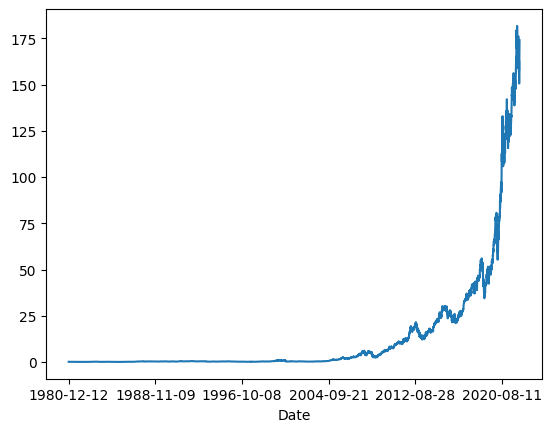

In [5]:
aapl['Adj Close'].plot()

In [6]:
#target variable=dependent variable
target=pd.DataFrame(aapl['Adj Close'])
#feature variables=independent variables
features=['Open','High','Low','Volume']
#Scaling data between 0 and 1 for precision and memory consumption
scaler=MinMaxScaler(feature_range=(0,1))
features_transform=scaler.fit_transform(aapl[features])
feature_transform=pd.DataFrame(columns=features,data=features_transform,index=aapl.index)
feature_transform

,Open,High,Low,Volume
Date,,,,
1980-12-12,0.000431,0.000433,0.000443,0.063198
1980-12-15,0.000397,0.000397,0.000405,0.023699
1980-12-16,0.000348,0.000348,0.000355,0.014246
1980-12-17,0.000361,0.000363,0.000371,0.011647
1980-12-18,0.000379,0.000381,0.000390,0.009897
...,...,...,...,...
2022-03-18,0.878848,0.899065,0.891886,0.016620
2022-03-21,0.895279,0.909290,0.910036,0.012910
2022-03-22,0.906233,0.926076,0.920646,0.010986


In [51]:
#Split Training and Test sets with 80/20
test_ratio=.1
training_ratio=1-test_ratio
test_size=int(test_ratio*len(aapl))
training_size=int(training_ratio*len(aapl))
x_train,x_test=feature_transform[:training_size],feature_transform[training_size:]
y_train,y_test=target[:training_size],target[training_size:]
train_x,test_x=np.array(x_train),np.array(x_test)
#n x m -> n arrays containing 1 array with m elements
x_train=train_x.reshape(x_train.shape[0],1,x_train.shape[1])
x_test=test_x.reshape(x_test.shape[0],1,x_test.shape[1])

In [52]:
lstm=Sequential()
lstm.add(LSTM(32,input_shape=(1,train_x.shape[1]),activation='relu',return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error',optimizer='adam')
history=lstm.fit(x_train,y_train,epochs=100,batch_size=32,verbose=1,shuffle=False)

Epoch 1/100
293/293 [==============================] - 1s 716us/step - loss: 88.7918
Epoch 2/100
293/293 [==============================] - 0s 680us/step - loss: 76.9560
Epoch 3/100
293/293 [==============================] - 0s 681us/step - loss: 68.5523
Epoch 4/100
293/293 [==============================] - 0s 677us/step - loss: 63.2379
Epoch 5/100
293/293 [==============================] - 0s 685us/step - loss: 58.4186
Epoch 6/100
293/293 [==============================] - 0s 677us/step - loss: 54.8505
Epoch 7/100
293/293 [==============================] - 0s 698us/step - loss: 50.5184
Epoch 8/100
293/293 [==============================] - 0s 683us/step - loss: 46.0803
Epoch 9/100
293/293 [==============================] - 0s 714us/step - loss: 41.1552
Epoch 10/100
293/293 [==============================] - 0s 719us/step - loss: 35.5283
Epoch 11/100
293/293 [==============================] - 0s 740us/step - loss: 29.3769
Epoch 12/100
293/293 [==============================] - 0s 712u

In [55]:
y_pred=lstm.predict(x_test)

33/33 [==============================] - 0s 512us/step


In [59]:
y_test['Predicted']=y_pred

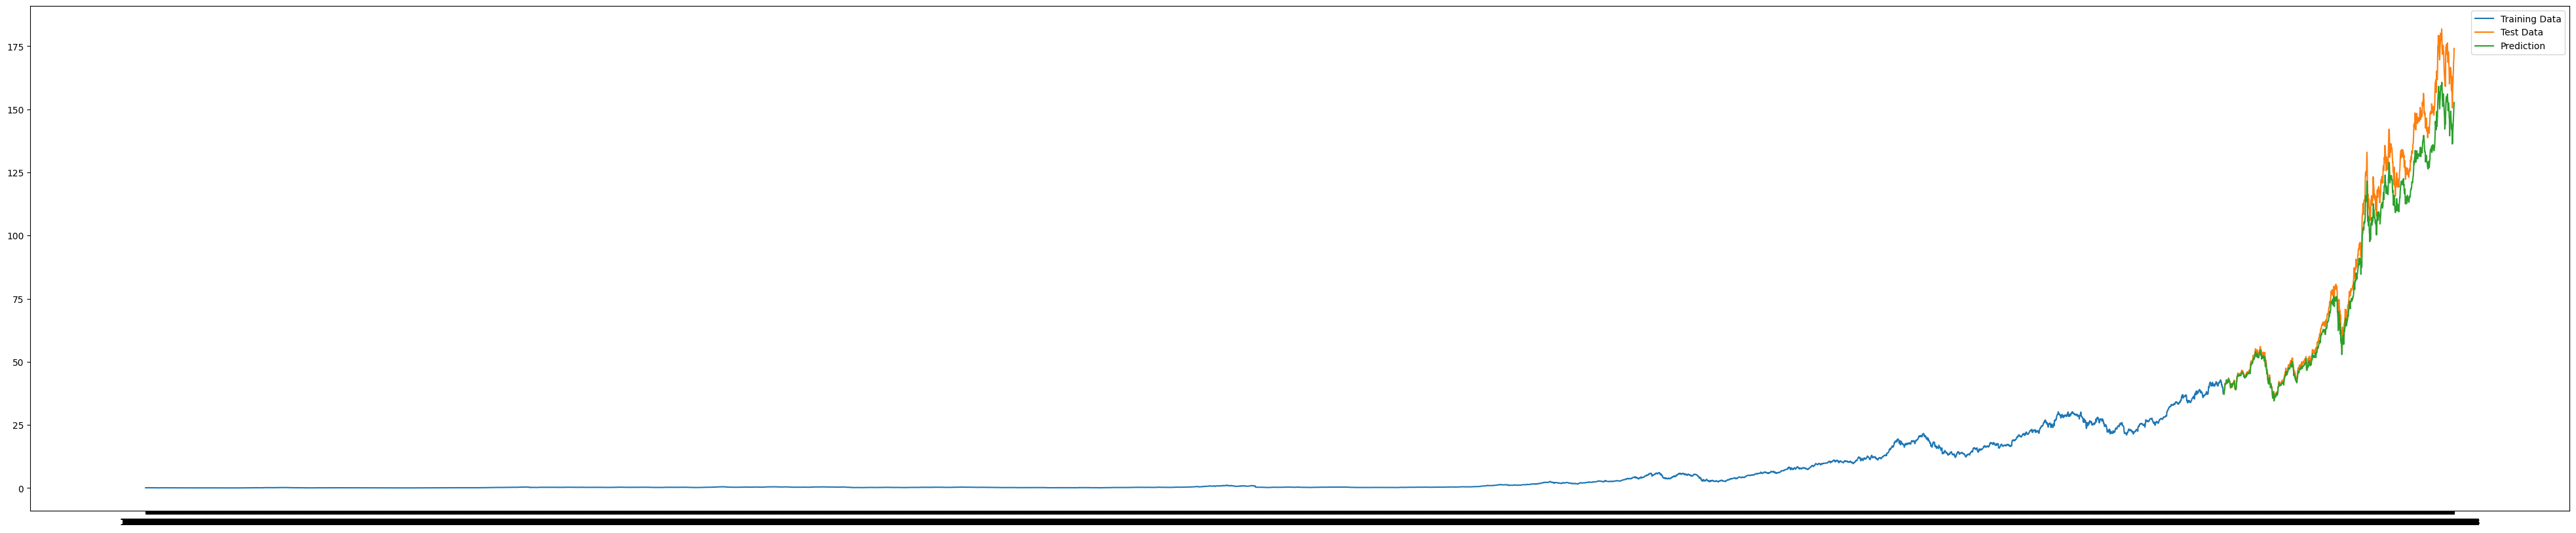

In [60]:
plt.figure(figsize=(50,10))
plt.plot(y_train['Adj Close'],label='Training Data')
plt.plot(y_test['Adj Close'],label='Test Data')
plt.plot(y_test['Predicted'],label='Prediction')
plt.legend()
plt.show()

In [62]:
#more test data=more accuracy
print('The Mean Squared Error: ',mean_squared_error(y_test['Adj Close'].values,y_test['Predicted'].values))
print('The Mean Absolute Error: ',mean_absolute_error(y_test['Adj Close'].values,y_test['Predicted'].values))
print('The Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test['Adj Close'].values,y_test['Predicted'].values)))

The Mean Squared Error:  76.6663812472651
The Mean Absolute Error:  6.302792272016746
The Root Mean Squared Error:  8.755934059097584
